# Lab 2 Report

### Group Members: Diego C.

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

# Exercise 1: Loops vs Numpy operations

<img src="lab2_exercise1.png" width="800">

In [2]:
import time # Import time to measure computational efficiency of the code

In [3]:
arr2d_1 = np.random.randn(1000, 1000) * 10
arr2d_2 = np.random.randn(1000, 1000) * 10

In [4]:
# Elementwise addition using loop

start_time_loop = time.time() # start time of the code

# len(arr2d_1[0]) gives the length of a row while len(arr2d_1) gives length of a column
# j parses through horizontal length and i parses through vertical length, ultimately going through all the
# combinations for the new array. Similar structure to a multiplication table.
arr2d_3_loop = [[arr2d_1[i][j]+arr2d_2[i][j] 
for j in range(len(arr2d_1[0]))] for i in range(len(arr2d_1))] 

end_time_loop = time.time() # end time of the code

elapsed_time_loop = end_time_loop - start_time_loop # end time - start time -> elapsed time in seconds
print(elapsed_time_loop)

0.5415506362915039


In [5]:
# Elementwise addition using Numpy function

start_time_np = time.time()

# Uses the numpy function to add two arrays.
arr2d_3_np = np.add(arr2d_1, arr2d_2) 

end_time_np = time.time()

elapsed_time_np = end_time_np - start_time_np
print(elapsed_time_np)

0.0029909610748291016


In [6]:
# Make sure two outputs are equivalent

np.sum(arr2d_3_loop == arr2d_3_np) == 1000 * 1000 # Should output True if the outputs are same

True

### Which computation is faster and by how much?

In [7]:
# Numpy function faster by about 0.6461 seconds

# Exercise 2: Generate Triangular Waveform

<img src="lab2_exercise2.png" width="800">

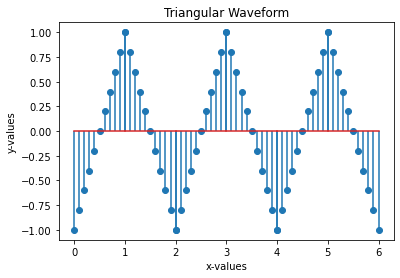

In [8]:
# Goes from 1 to -1, we have -1-.2 so that it includes -1.
y_negative = np.arange(1 , -1-.2, -.2)
# Goes from -1 to 1, we have 1+.2 so that it includes 1
y_positive = np.arange(-1, 1+.2, .2)
# loops 3 times for the 3 triangles , 3 times for the negative line and 3 times for the postive line.
for i in range(0,3):
    # For negative, starting points have equation start=2(i-0)+1. Ending points have equation end=2(i-0)+2 
    # The plus .1 is so that includes the ending point.
    x_negative = np.arange(2*i+1, 2*i+2+(.1), .1)
    # For positve, startin points have equation start=2(i-0)+0. Ending points have equation end= 2i+1. 
    # The plus .1 is so that includes the ending point. 
    x_positive = np.arange(2*i, 2*i+1+(.1), .1)
    # Plots both lines and repeats 3 times
    plt.stem(x_positive, y_positive)
    plt.stem(x_negative, y_negative)
plt.title('Triangular Waveform')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.show()


# Exercise 3: Sinusoidal Generator

<img src="lab2_exercise3.png" width="800">

In [9]:
# Define generate_sine function

def generate_sine(t_duration, f0, fs):
    # Make time vector starting from 0 and until desired length and take sample every sampling frequency.
    # 1/fs gives sampling frequency.
    t_arr = np.arange(0, t_duration, 1/fs)
    # Using the time vector, use numpy sin function to generate another vector of amplitudes.
    amplitudes = np.sin(t_arr * f0 * 2 * np.pi)
    # Return 1D numpy arrays each containing timepoints and sine waveform amplitudes.
    return t_arr, amplitudes 

In [10]:
# parameter set 1
t_duration_1 = 5
f0_1 = 0.5
fs_1 = 100
t_arr_1, amplitudes_1 = generate_sine(t_duration_1, f0_1, fs_1)

# parameter set 2
t_duration_2 = 5
f0_2 = 1.
fs_2 = 100
t_arr_2, amplitudes_2 = generate_sine(t_duration_2, f0_2, fs_2)

# parameter set 3
t_duration_3 = 5
f0_3 = 1.5
fs_3 = 100
t_arr_3, amplitudes_3 = generate_sine(t_duration_3, f0_3, fs_3)

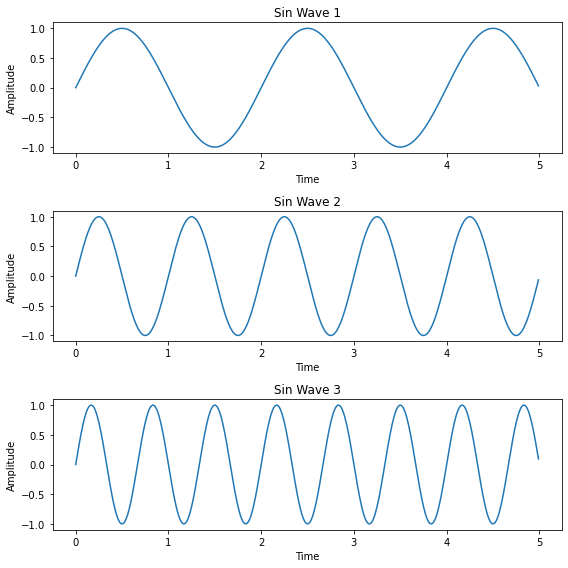

In [11]:
# Plot 3 x 1 subplot showing all three waveform

# Code to graph the sine waves generated.
fig = plt.figure(2, figsize = (8,8))
plt.subplot(311)
plt.title('Sin Wave 1')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t_arr_1, amplitudes_1)
plt.subplot(312)
plt.title('Sin Wave 2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t_arr_2, amplitudes_2)
plt.subplot(313)
plt.title('Sin Wave 3')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t_arr_3, amplitudes_3)
fig.tight_layout()

# Exercise 4: Notes Synthesis

<img src="lab2_exercise4.png" width="800">

In [12]:
# Assigning values to variables.
fs = 8000
amplitude = 1

# Method is given a frequency (f) associated with the note and a duration (how long the note should play for).
def create_signal(f, duration):
    # Returns evenly spaced numbers given time interval and how long you want in between numbers.
    # fs * duration 
    t = np.linspace(0, duration, int(fs * duration))
    # The signal is generated using numpy sine function.
    signal = amplitude * np.sin(2 * np.pi * f * t)
    return signal

# Creating all the different signals.
a_wave = create_signal(220, 1)
b_wave = create_signal(220 * 2**(2/12), 1)
cs_wave = create_signal(220 * 2**(4/12), 1)
d_wave = create_signal(220 * 2**(5/12), 1)
e_wave = create_signal(220 * 2**(7/12), 1)
fs_wave = create_signal(220 * 2**(9/12), 1)
gs_wave = create_signal(220 * 2**(11/12), 1)
a2_wave = create_signal(440, 1)

# Combining all the individual waves into a single array to output into a file.
final = np.concatenate([a_wave, b_wave, cs_wave, d_wave, e_wave, fs_wave, gs_wave, a2_wave])
final *= 32767
final = np.int16(final)
outfile = "a_major_scale.wav"
wav.write(outfile, fs, final)


In [13]:
# NOTE: Multiply your concatenated notes (with amplitude of 1) with 32767 followed by conversion to int16 format
# before playing or writing your audio array into a file. 

# Exercise 5: Chord Synthesis

<img src="lab2_exercise5.png" width="800">

In [14]:
# Method accepts two waves (which were all generated in Exercise 4).
def make_chord(wave1, wave2):
    # Simply add the two waves.
    chord = wave1 + wave2
    # Adding the two waves gives us an amplitude that exceeds the max amount. This is problematic so we have this
    # line of code to make sure that none of the amplitudes will ever exceed the max amount.
    chord = chord / np.max(chord)
    return chord

# Creating the different chords.
chord_1 = make_chord(a_wave, cs_wave)
chord_2 = make_chord(b_wave, d_wave)
chord_3 = make_chord(cs_wave, e_wave)
chord_4 = make_chord(d_wave, fs_wave)
chord_5 = make_chord(e_wave, gs_wave)
chord_6 = make_chord(fs_wave, a2_wave)

# Combining all the chords into one array to output them into a single file.
final_2 = np.concatenate([chord_1, chord_2, chord_3, chord_4, chord_5, chord_6])
final_2 *= 32767
final_2 = np.int16(final_2)
outfile_2 = "6_chords.wav"
wav.write(outfile_2, fs, final_2)

In [15]:
# NOTE: Multiply your concatenated notes (with amplitude of 1) with 32767 followed by conversion to int16 format
# before playing or writing your audio array into a file. 